In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  

In [58]:
df = pd.read_csv('AirBnb Dataset.csv')

In [59]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,07-06-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10-11-2015,0.10,3.0,1.0,386.0,NaN,NaN


In [60]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [61]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [62]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace=True)

df.dropna(subset=['NAME', 'host name'], inplace=True)

print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [63]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [66]:
df = df.drop(columns=["license", "house_rules"], errors='ignore')

df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-08-25,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,696.0,NaN,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,909.0,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,387.0,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,848.0,NaN,2.0,0.0,2012-08-25,0.00,1.0,1.0,0.0


In [67]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2016-02-20 18:00:47.285277440,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-08-25 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2012-08-25 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2015-12-14 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-06-17 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


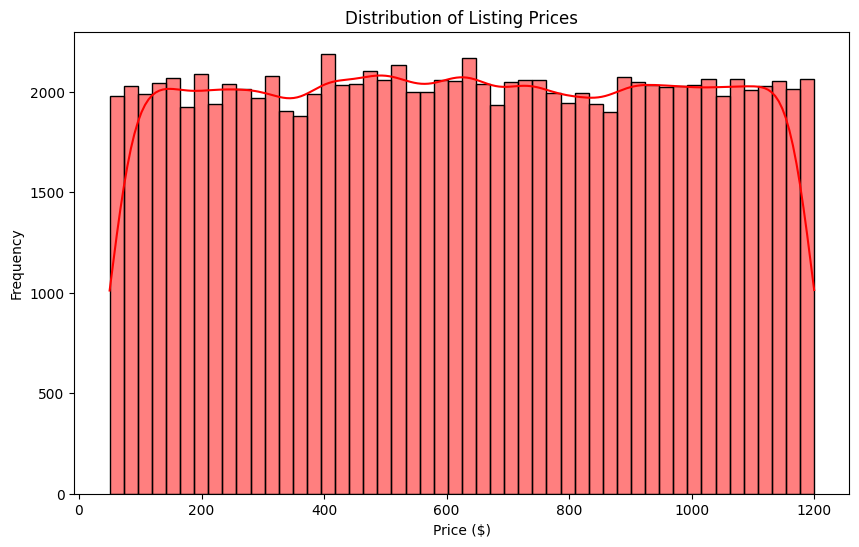

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'] , bins=50, kde=True, color='red')   
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

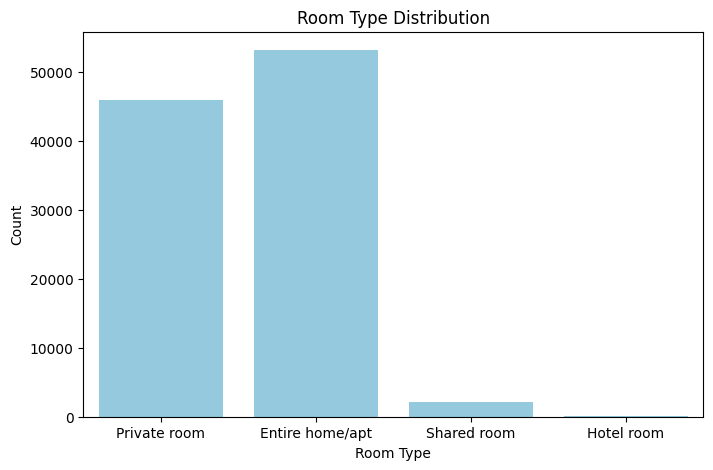

In [81]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df , color='skyblue')  # Set bar color
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

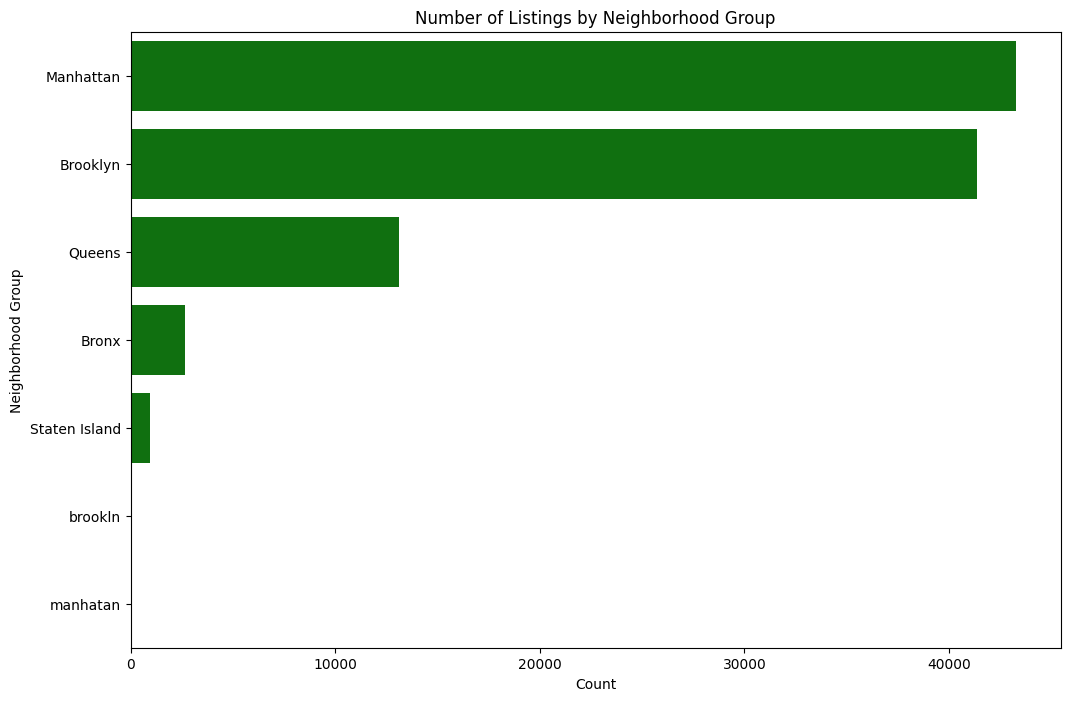

In [82]:
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood group', data=df,color="green" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

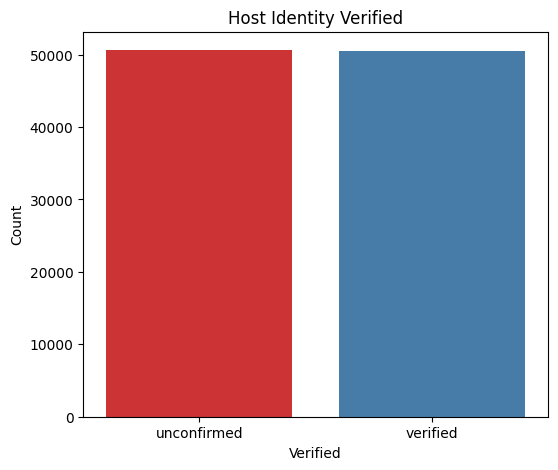

In [71]:
plt.figure(figsize=(6, 5))
sns.countplot(x='host_identity_verified', data=df, palette='Set1')
plt.title('Host Identity Verified')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()


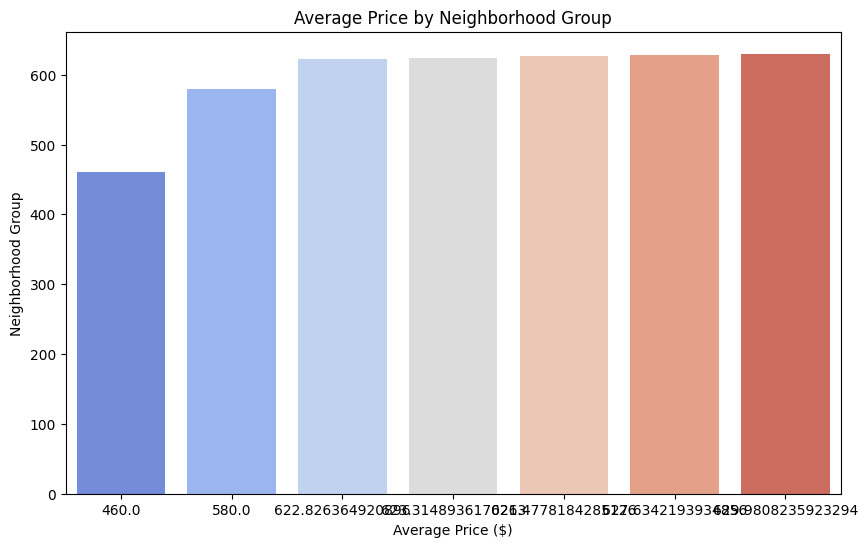

In [72]:
plt.figure(figsize=(10, 6))
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values()
sns.barplot(x=avg_price.values, y=avg_price.values, palette='coolwarm' , legend=False )
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood Group')
plt.show()


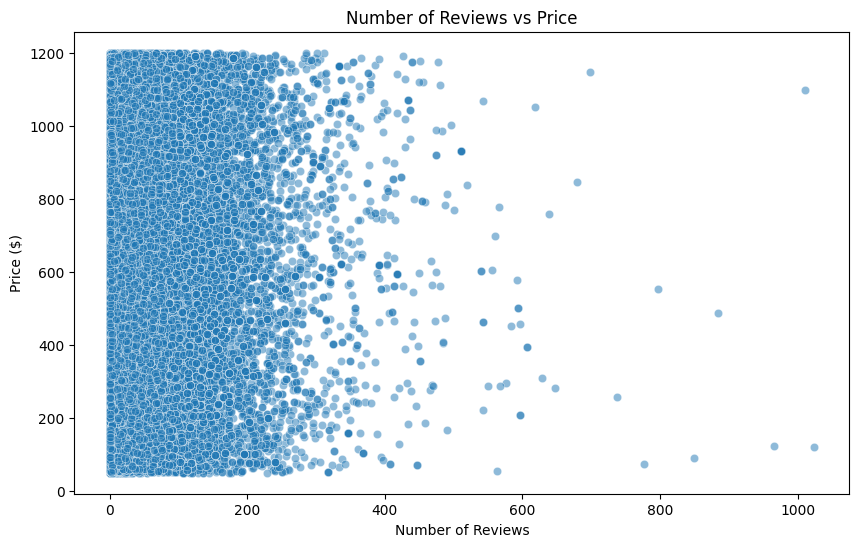

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number of reviews', y='price', data=df, alpha=0.5)
plt.title('Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()


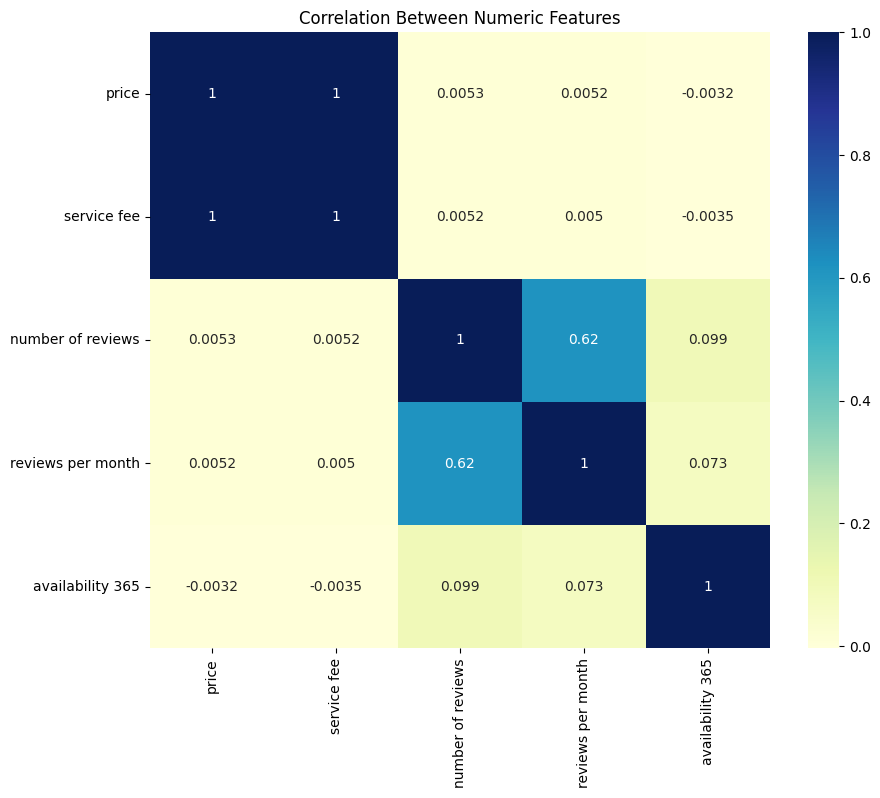

In [74]:
plt.figure(figsize=(10, 8))
numeric_cols = ['price', 'service fee', 'number of reviews', 'reviews per month', 'availability 365']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Numeric Features')
plt.show()


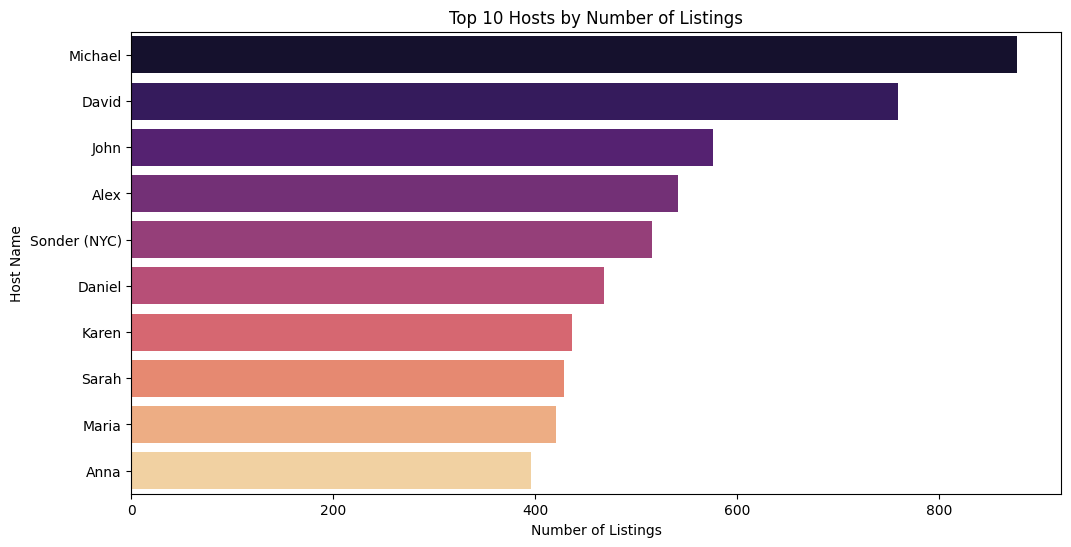

In [75]:
top_hosts = df['host name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='magma',hue=None)
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()
